# Support Vector Machine

### Loading and Visualizing Data 

In [4]:
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y']

x_min = X[:,0].min() - 0.1
x_max = X[:,0].max() + 0.1
y_min = X[:,1].min() - 0.1
y_max = X[:,1].max() + 0.1

#Plots the data points X and y into a new figure 
def plotDataClassification(X, y):
    for index,val in enumerate(y):
        if y[index] == 0:
            plt.scatter(X[index, 0], X[index, 1], color='blue', s=7)
        else:
            plt.scatter(X[index, 0], X[index, 1], color='red', s=7)
    
    tolerance = 0.3
    plt.axis([min(X[:, 0]) - tolerance, max(X[:, 0]) + tolerance, min(X[:, 1]) - tolerance, max(X[:, 1]) + tolerance])        
    plt.xlabel('X axes')
    plt.ylabel('y axes')
    
    
plotDataClassification(X, y)


### Train a linear SVM on the dataset and plot the decision boundary learned

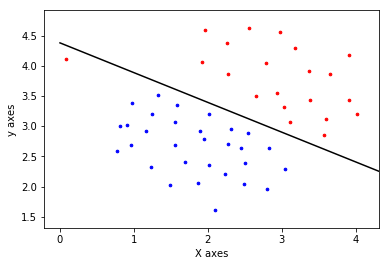

In [5]:
#training
C=10
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y.ravel())

#evaluate accuracy
accuracy = clf.score(X, y)

#make new prediction
prediction = clf.predict([[5.9643, 10.5957]])

#plot decision boundary
def plot_linear_boundary(clf):
    # w in this case is a <2,1> vector containing theta1 and theta2, the optimized coefficients related to x1 and x2
    w = clf.coef_[0]

    # line slope
    a = -w[0] / w[1]

    # generating an x grid
    xx = np.linspace(0,12)

    # calculating the decision boundary function on the x grid
    # clf.intercept_[0] is actually equal to theta0
    yy = a * xx - clf.intercept_[0] / w[1]

    # plot the line
    h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
plot_linear_boundary(clf)
plotDataClassification(X, y)


### Gaussian Kernel

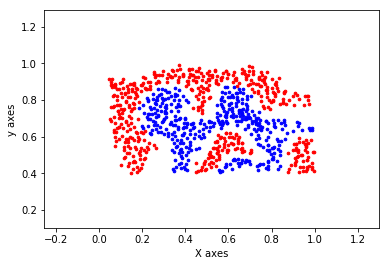

In [6]:
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y']

#plot data
plotDataClassification(X, y)


In [33]:
#todo:plot decision boundary for non-linear function

### Spam Classification with SVMs

In [20]:
import pandas as pd
import re, cgi
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize


#reads the fixed vocabulary list in vocab.txt and returns a cell array of the words in vocabList
def get_vocabList():
    vocab = pd.read_table('vocab.txt', delim_whitespace=True, header=None)
    vocab = vocab.iloc[:,-1].values.tolist()
    return vocab
       

#preprocesses the body of an email and returns a list of indices of the words contained in the email
def process_email(file_contents):
    #read email
    with open(file_contents, 'r') as myfile:
        email = myfile.read()
        original_email = email

    vocabList = get_vocabList()

    # set all character in lower case
    email = email.lower()

    #strip all HTML
    email = re.sub('<[^<]+?>', '', email)

    #replace any number into the string 'number'
    email = re.sub('[0-9]+', 'number ', email) 

    #replace strings starting with http:// or https:// with the string 'httpaddr'
    email = re.sub('(http|https)://[^\s]*', 'httpaddr ', email) 

    #replace email with string 'emailaddr'
    email = re.sub('[^\s]+@[^\s]+', 'emailaddr ', email) 

    #replace dollar sign ($) with string 'dollar'
    email = re.sub('[$]+', 'dollar ', email) 
    
    word_indices = np.array([])
    for word in email.split():
        word = re.sub('[^a-zA-Z0-9]', '', word)
        ps = PorterStemmer()
        word = ps.stem(word)
        for index in range(len(vocabList)):
            if vocabList[index] == word:
                word_indices = np.append(word_indices, index)
    return word_indices, original_email, vocabList

#takes in a word_indices vector and produces a feature vector from the word indices
def email_feature(word_indices, vocabList):
    x = np.zeros(len(vocabList))
    for index in range(len(word_indices)):
        x[int(word_indices[index])] = 1
    return x

### Testing on pre-processed dataset

In [21]:
data = sio.loadmat('spamTrain.mat')
X_train = data['X']
y_train = data['y']

data = sio.loadmat('spamTest.mat')
X_test = data['Xtest']
y_test = data['ytest']

C=0.1
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X_train, y_train.ravel())

train_accuracy = (clf.predict(X_train).reshape(-1,1) == y_train.reshape(-1,1)).sum()/y_train.shape[0]

test_accuracy = (clf.predict(X_test).reshape(-1,1) == y_test.reshape(-1,1)).sum()/y_test.shape[0]
print('Linear SVM Decision Boundary with C = 0.1. Train Accuracy = %2.1f%%; Test Accuracy = %2.1f%%' % (train_accuracy*100, test_accuracy*100))


Linear SVM Decision Boundary with C = 0.1. Train Accuracy = 99.8%; Test Accuracy = 98.9%


### Running the Spam Classifier on unseen emails

#### Non-spam email

In [22]:
word_indices, mail, vocabList = process_email('emailSample1.txt')
feature = email_feature(word_indices, vocabList)
print(mail)
print('Classified as (1 indicates spam, 0 indicates not spam):', clf.predict(feature.reshape(-1, 1).T))

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com


Classified as (1 indicates spam, 0 indicates not spam): [0]


#### Spam email

In [26]:
word_indices, mail, vocabList = process_email('spamSample1.txt')
feature = email_feature(word_indices, vocabList)
print(mail)
print('Classified as (1 indicates spam, 0 indicates not spam):', clf.predict(feature.reshape(-1, 1).T))

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72


Classified as (1 indicates spam, 0 indicates not spam): [1]


In [60]:
import email
import os

#removing headers and keep just body's mails
word_indices, mail, vocabList = process_email('spamAssassinPublicCorpus/spamEmails/00003.2ee33bc6eacdb11f38d052c44819ba6c')
b = email.message_from_string(mail)
if b.is_multipart():
    for payload in b.get_payload():
        mail = payload.get_payload()
else:
    mail = b.get_payload()
#print(mail)


destdir = '/home/pptr/Desktop/machine-learning-ng/assignment6/ex6/spamAssassinPublicCorpus/spamEmails/'
for entry in os.scandir(destdir):
    if entry.is_file():
        print(entry.name)

00406.05e2214fea602970426862295f9b4a2e
00341.99b463b92346291f5848137f4a253966
00121.bf18a63d6e7d40409f8b722036eadd82
00023.b6d27c684f5fc803cfa1060adb2d0805
00186.a66b4fc4ab114c9cb37e1a31d1ea1aeb
00228.cf58326ab05a757c7e759acc8d6b360d
00024.6b5437b14d403176c3f046c871b5b52f
00397.1a99f98a5b996f99f3661e9609782932
00338.a595ffbb6cbcf3a5058293051ebaabf4
00282.0e230e05877f40a522bfb93aa3e314f3
00458.62211764fde0dd7128ea4146268b40dd
00149.c07359393107925a86798dd72d6a56b3
00193.c04ef77bc3dbaa5762760a6ea138df0e
00110.f3c4ebe14b439420b53212332326181f
00042.3e934ba4075f82283d755174d2642b76
00464.8240aba24840864cb7439fc03f94ef6e
00420.e208f7d65551c01efaa3b4ee4bc4df3c
00383.1aa9a8211d1de540d6e3852e230e5a9d
00376.f4ed5f002f9b6b320a67f1da9cacbe72
00224.0654fe0af51e1dcefa0eb66eb932f55f
00231.77a5d20da55f185c1bb7a3949332d364
00281.db28f3aab77ff478279d8de20d572b42
00160.cec5f611ae665ff0add6c4928d47f2be
00039.889d785885f092c269741b11f2124dce
00196.dd21040c7757d477c967ae71b537810e
00064.65b95365450ebe5eef6